In [9]:
import numpy as np
import predict as prd
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

%matplotlib inline

In [10]:
def smoothen(data, sam=41):
    return savgol_filter(data, sam, 2, deriv=0)

In [11]:
df = pd.read_csv('beer_recipes.csv', sep=None)

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [12]:
df = pd.read_csv('sales4.csv', sep=None)

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [13]:
df

,Month,ipa bier: (Germany),pale ale bier: (Germany),helles bier: (Germany),porter bier: (Germany)
0,2012-01-01,46.25,100.07,65.71,47.88
1,2012-02-01,40.88,178.80,85.22,15.77
2,2012-03-01,43.65,122.28,75.37,19.41
3,2012-04-01,68.13,103.91,85.51,26.47
4,2012-05-26,69.27,180.00,125.99,22.00
5,2012-06-05,62.10,193.24,138.77,16.91
6,2012-07-12,128.77,189.03,130.25,18.03
7,2012-08-19,68.82,165.45,131.67,36.35
8,2012-09-26,22.90,54.00,53.93,5.99
9,2012-10-26,35.60,72.00,39.13,3.62


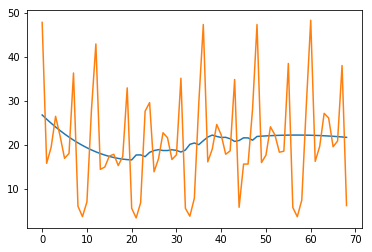

In [14]:
colname = 'porter bier: (Germany)'

plt.plot(smoothen(df[colname], sam=41))
plt.plot(df[colname])

In [15]:
df[colname] = smoothen(df[colname], sam=41)
df.to_csv(path_or_buf='text.csv')

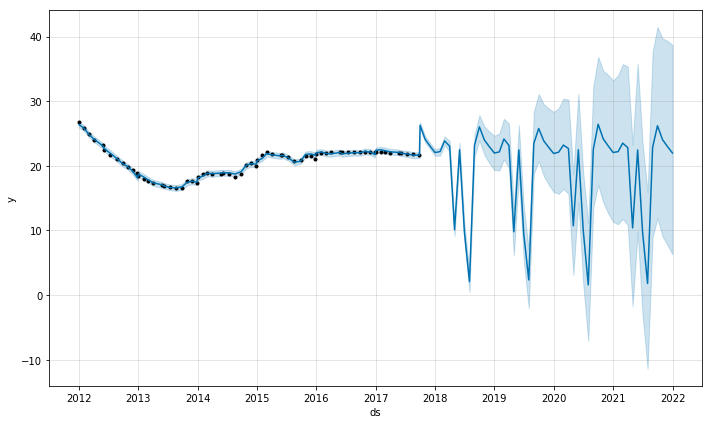

In [16]:
prd.predict('text.csv', 'test.csv', colname, periods=52, ws=False, predfreq='M')

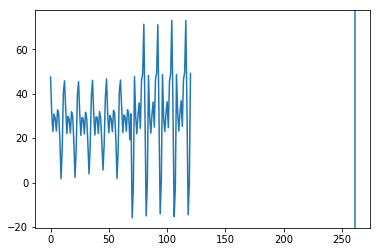

In [93]:
df = pd.read_csv('test.csv')
plt.plot(df['yhat'])
plt.axvline(261)

/home/ge0rg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


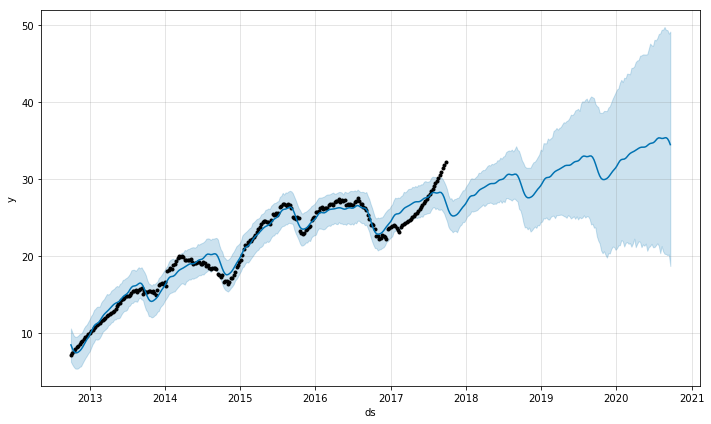

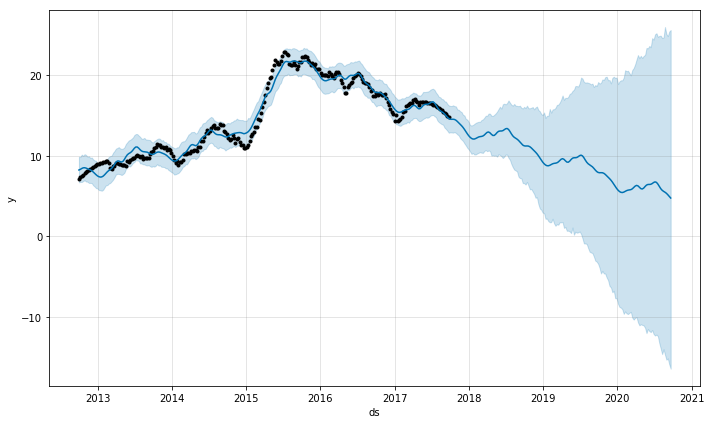

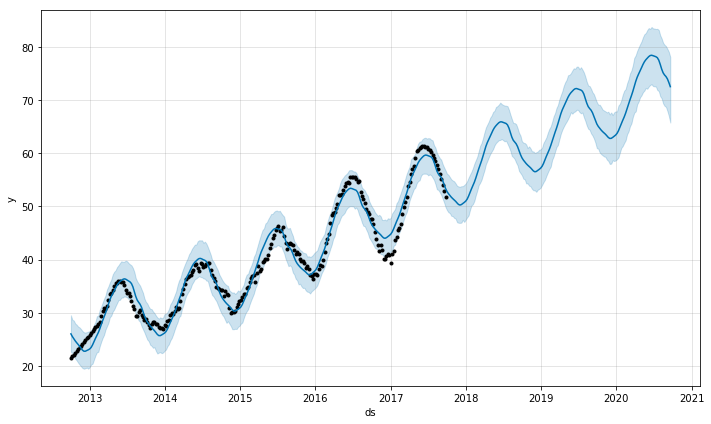

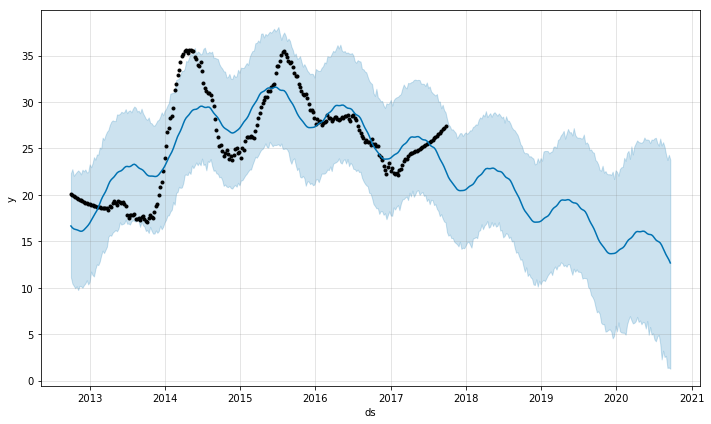

In [27]:
df = pd.read_csv('all4.csv', sep=None)
colnames = ['ipa bier: (Germany)', 'pale ale bier: (Germany)', 'helles bier: (Germany)', 'porter bier: (Germany)']
sams = [61, 41, 41, 51]

for k, colname in enumerate(colnames):
    df[colname] = smoothen(df[colname], sam=sams[k])
    df.to_csv(path_or_buf=colname+'_t'+'.csv')
    prd.predict(colname+'_t'+'.csv', colname+'.csv', colname, periods=156, ws=False, predfreq='W')